# 2018년 1학기 컴퓨터언어학 기말 프로젝트
## *한국어 뉴스 기사 분류*



## 언어학과 노하경

(AWS r4.8xlarge instance - ubuntu)


In [1]:
# Import dependencies

import sys
from os import listdir
import time
import re
import numpy as np
import codecs
import collections
import hanja
from konlpy.tag import Twitter
from konlpy.tag import Komoran
from konlpy.tag import Kkma
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation, Flatten
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import model_from_json
import csv
import matplotlib.pyplot as plt

# fix random seed for reproducibility
np.random.seed(5)
np.set_printoptions(suppress=True)

Using TensorFlow backend.
/home/ubuntu/env/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/env/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


# 1. Konlpy 태그 모듈 선택


### Kkma

오류 예시: \['남비난', '비난', '미정상회담', '정상', '회담', '맥스', '맥스선더', '태영호', '영호', '17', '11', '11일', '2주간', '주간'\]

특징: 중복 처리되는 단어들 많음, 숫자와 날짜 남아있음 (twitter, komoran은 제거함)


### Hannanum

오류 예시: \['【서울=뉴시스】김성진', '22일'\]

특징: 일부 특수문자 처리 안됨, 숫자와 날짜 남아있음 (twitter, komoran은 제거함)


### Twitter

예시: \['연일', '남비', '한미정상회담', '경고', '메시지', '발신', '맥스', '선더', '영호', '불만', '표시', '최종', '조율', '의제', '반발', '북중', '관계', '개선', '시진핑', '의중', '반영', '서울', '뉴시스', '김성진', '기자', '북한', '이틀', '대남', '대미', '비난', '의도', '대해', '관심', '북한', '물론', '대미', '관계', '조금', '무게', '모양새', '한미', '정상회담', '비난', '수위', '한국', '미국', '각각', '불만', '풀이', '북한', '지난', '한미', '공군', '연합', '훈련', '맥스', '선더', '자신', '최고', '존엄', '영호', '주영', '북한', '대사관', '공사', '대해', '불만', '출하', '남북', '고위', '회담', '무기한', '연기', '통보', '김계관', '외무성', '부상', '담화', '통해', '포기', '보상', '검증', '비핵화', '미국', '리선', '조국', '평화통일', '위원회', '위원장', '조선', '중앙', '통신', '통해', '남조선', '당국', '괴이', '논리', '조선반도', '평화', '화해', '흐름', '가로막', '장애물', '하나', '북침', '전쟁', '연습', '합리화', '비방', '중상', '지속', '철면피', '파렴치', '극치', '비난', '위원장', '북남', '고위', '회담', '중지', '엄중', '사태', '남조선', '정권', '다시', '마주', '라며', '차후', '북남관계', '방향', '전적', '남조선', '당국', '행동', '리선', '위원장', '발언', '표면', '판문점', '선언', '정신', '부합', '즉각', '회담', '우리', '정부', '성명', '대한', '반발', '전날', '맥스', '선더', '훈련', '공사', '대해', '경고', '메시지', '발신', '방치', '정부', '대한', '유감', '불만', '표시', '전문가', '북한', '일련', '행보', '최종', '비핵화', '담판', '벌이', '미국', '방점', '홍민', '통일', '연구원', '북한', '연구실', '북한', '최종', '미국', '라며', '미국', '조절', '의제', '방식', '문제', '제기', '실장', '자신', '통제', '이야기', '최대한', '폼페이', '조율', '이야기', '표현', '라며', '자신', '선의', '비핵화', '취지', '왜곡', '때문', '정도', '정리', '입장', '다음주', '개최', '한미', '정상회담', '목표', '비난', '수위', '가능성', '제기', '자칫', '한미', '구도', '시도', '분석', '지난', '북중', '정상회담', '이후', '북중', '관계', '중국', '의중', '가능성', '제기', '지난', '김정은', '북한', '국무위원', '중국', '외교부', '평양', '면담', '중국', '다롄', '시진핑', '중국', '국가주석', '정상회담', '지난', '주석', '도널드', '트럼프', '미국', '대통령', '전화통화', '미국', '북한', '합리', '안보', '우려', '바란', '기도', '중국', '북한', '모두', '견제', '주한', '미군', '군사', '동맹', '미국', '핵우산', '제공', '염두', '발언', '트럼프', '대통령', '백악관', '옌스', '스톨', '베르크', '북대서양', '조약', '기구', '사무', '총장', '만난', '자리', '주석', '김정은', '영향', '가능성', '매우', '면서', '무슨', '일이', '기도', '신범철', '아산', '정책', '연구원', '안보', '통일', '센터', '북중', '관계', '정세', '변화', '따라서', '북한', '입장', '약간', '비핵화', '협상', '미국', '강도', '북한', '나름', '목소리', '위해', '남북관계', '역시', '자신', '불만', '다만', '북한', '협상', '위해', '행보', '풀이', '한편', '경색', '국면', '남북', '대화', '북한', '지난', '주간', '계획', '맥스', '선더', '훈련', '명분', '남북', '고위', '회담', '만큼', '한미', '정상회담', '맥스', '선더', '훈련', '종료', '다시', '재개', '관측', '이후', '바로', '북미', '정상회담', '때문', '판문점', '선언', '개최', '합의', '남북', '장성', '회담', '개최', '전망'\]


특징: 속도는 빠르나, komoran에 비해 분석되는 어휘 수가 적음


### Komoran

예시: \['연일', '비난', '한미정상회담', '경고', '메시지', '발신', '맥스', '선더', '영호', '불만', '표시', '의제', '반발', '북중', '관계', '개선', '시진핑', '의중', '반영', '서울', '뉴시스', '김성진', '기자', '북한', '이틀', '대남', '대미', '비난', '의도', '관심', '북한', '대미', '관계', '무게', '모양새', '한미 정상회담', '비난', '수위', '한국', '미국', '불만', '표출', '풀이', '북한', '미 공군', '연합', '훈련', '맥스', '선더', '자신', '최고', '존엄', '영호', '주영', '북한', '대사관', '공사', '불만', '표출', '남북', '고위급', '회담', '무기', '연기', '통보', '김계관', '외무성', '부상', '담화', '포기', '보상', '완전', '검증', '비핵화', '주장', '미국', '규탄', '조국평화통일위원회', '위원장', '조선중앙통신', '남조선', '당국', '논리', '조선반도', '평화', '화해', '흐름', '장애물', '제거', '전쟁', '연습', '합리', '비방', '중상', '지속', '철면피', '파렴치', '극치', '비난', '위원장', '북남', '고위급', '회담', '중지', '사태', '해결', '남조선', '정권', '차후', '북남', '관계', '방향', '전적', '남조선', '당국', '행동', '여하', '위원장', '발언', '표면', '판문점', '선언', '정신', '부합', '회담', '정부', '성명', '반발', '전날', '맥스', '선더', '훈련', '공사', '경고', '메시지', '발신', '방치', '정부', '유감', '불만', '표시', '전문가', '북한', '일련', '행보', '결국', '최종', '비핵화', '담판', '미국', '방점', '분석', '통일연구원', '북한', '연구실장', '북한', '최종', '미국', '미국', '조절', '의제', '방식', '문제', '제기', '분석', '실장', '자신', '통제', '이야기', '최대한', '폼페이', '오와', '조율', '이야기', '불편', '표현', '자신', '선의', '비핵화', '취지', '왜곡', '불편', '때문', '정도', '정리', '입장', '다음', '개최', '한미 정상회담', '목표', '비난', '수위', '제기', '한미', '구도', '시도', '분석', '북중', '정상회담', '이후', '북중', '관계', '개선', '중국', '의중', '반영', '제기', '김정은', '북한', '국무', '위원장', '중국', '외교부장', '평양', '면담', '중국', '다롄', '중국 국가주석', '정상회담', '주석', '도널드 트럼프', '미국 대통령', '전화통', '미국', '북한', '합리', '안보', '우려', '고려', '중국', '북한', '양측', '견제', '주한미군', '군사', '동맹', '미국', '핵우산', '제공', '염두', '발언', '트럼프', '대통령', '백악관', '옌스', '스톨', '베르크', '북대서양조약기구', '사무총장', '자리', '주석', '김정은', '영향', '신범철', '아산정책연구원', '안보', '통일', '센터', '북중', '관계', '정세', '변화', '북한', '입장', '비핵화', '협상', '미국', '강도', '북한', '나름', '목소리', '이야기', '남북관계', '자신', '불만', '표현', '북한', '협상', '전개', '행보', '풀이', '한편', '경색', '국면', '남북', '대화', '북한', '주간', '계획', '맥스', '선더', '훈련', '명분', '남북', '고위급', '회담', '연기', '만큼', '한미 정상회담', '맥스', '선더', '훈련', '종료', '재개', '관측', '이후', '북미', '정상회담', '때문', '판문점', '선언', '개최', '합의', '남북', '장성', '회담', '개최', '전망'\]

특징: 4개 모듈 중에서는 정확도가 높다고 판단. '조국평화통일위원회'와 같은 복함 단어를 개별 토큰으로 분석. 이 프로젝트에서는 기사별 특징을 보다 효율적으로 표현할 수 있을 것으로 판단하여 최종적으로 komoran 태그를 사용하였습니다.

In [2]:
# Create konlpy tags
twitter = Twitter()
komoran = Komoran()
kkma = Kkma()

# 2. Functions

### 전처리 프로세스 및 특징


1. 특수문자는 '…'과 '·'만 제거. 나머지는 konlpy에서 처리.
2. 괄호 안에 있는 정보는 부가적인 내용으로 판단되어 제거. (부가설명, 이름, 나이, 한자 병기 등)
3. 2번 처리 후 남아있는 한자들은 한글로 번역.
4. konlpy 모듈로 형태소 분석 및 "명사"만 추출. - 명사를 기준으로 학습.
5. 중복되는 어휘, 1음절 토큰은 제거.
6. 폴더 안에 있는 모든 기사들을 토큰화 하고, 최종적인 VOCAB 사전으로 저장. (단어 : 인덱스) 2회 미만 출현 단어들은 무시.
7. 전처리 중에 분석된 기사들은 (재분석하는 과정을 없애기 위해) 별도의 사전 객체로 저장. (파일명\[예: 0001\] : 토큰화된 기사)
8. 어휘 사전, 토큰화된 기사들 사전, 총 어휘 수 반환

- 160:40 으로 트레이닝, 테스트 데이터 생성
- 자료를 불러올 때 편하게 트레이닝하기 위해 테스트 파일 인덱스를 별도의 리스트로 정리. 트레이닝: \[000 ~ 159\], 테스트" \[160 ~ 199\]
- Zero Padding 적용. 가장 긴 기사 길이로 통일.
- CNN을 위해 3차원으로 자료 변환.
- 임베딩은 사용하지 않음.


In [3]:
#===================================================FUNCTIONS===================================================

def one_hot_encoding(x, output_size):
    encoded_data = np.zeros((len(x), output_size))
    for i in range(len(x)):
        encoded_data[i][x[i]] = 1
    return encoded_data

# Generate labels set for training and test data
# labels_count: how many categories?
# set_size: how many items are allocated for training or test data set
def generate_label_set(labels_count, set_size, one_hot):
    label_set = list()
    for i in range(labels_count):
        for x in range (set_size):
            label_set.append(i)
    if one_hot == True:
        one_hot_data = one_hot_encoding(label_set, labels_count)
        return one_hot_data
    else:
        return np.array(label_set) # No one-hot-encoding

# Preprocess raw korean article text file. Input- file name, konlpy package name, minimum syllables, remove duplicates T/F
def kr_text_preprocess(text, packageName, minSyllables, shrink):
    raw_file = codecs.open(text, "r", encoding='utf-8', errors='ignore').read()
    remove_spChar = re.sub(r'[…·]', ' ', raw_file) # Remove special characters
    remove_par = re.sub(r'\([^)]*\)', "", remove_spChar) # Remove contents inside parenthesis
    hanja2kr = hanja.translate(remove_par, 'substitution')  # Translate hanja
    if packageName == 'twitter':
        text_nouns = twitter.nouns(hanja2kr)
    elif packageName == 'komoran':
        text_nouns = komoran.nouns(hanja2kr)
    elif packageName == 'kkma':
        text_nouns = kkma.nouns(hanja2kr)
    else:
        text_nouns = ["Not a correct package name!"]
    remove_short = [x for x in text_nouns if len(x) > (minSyllables - 1)]   #Ignore words that are shorter than x syllables
    if shrink == True:
        no_duplicates = list(set(remove_short))
        return no_duplicates
    else:
        return remove_short

# Preprocessing string array for prediction
def kr_string_preprocess(article_string, packageName, minSyllables, shrink):
    raw_file = article_string
    remove_spChar = re.sub(r'[…·]', ' ', raw_file) # Remove special characters
    remove_par = re.sub(r'\([^)]*\)', "", remove_spChar) # Remove contents inside parenthesis
    hanja2kr = hanja.translate(remove_par, 'substitution')  # Translate hanja
    if packageName == 'twitter':
        text_nouns = twitter.nouns(hanja2kr)
    elif packageName == 'komoran':
        text_nouns = komoran.nouns(hanja2kr)
    elif packageName == 'kkma':
        text_nouns = kkma.nouns(hanja2kr)
    else:
        text_nouns = ["Not a correct package name!"]
    remove_short = [x for x in text_nouns if len(x) > (minSyllables - 1)]   #Ignore words that are shorter than x syllables
    if shrink == True:
        no_duplicates = list(set(remove_short))
        return no_duplicates
    else:
        return remove_short

# Preprocess all files in a given directory and create word, articles dictionary
def create_dictionary_and_backup_articles(directory, category_folders_count, minOccurance):
    articles_backup = {}    # Backup pre-processed articles made while creating dictionary
    final_dictionary = {}   # Final dictionary with all unique words in newsData folder
    total_words = list()    # Temporary list with all words (duplicates exist)

    # Go through all files in subfolders of directory, pre-process text files, save short version article, create whole dictionary
    for i in range(category_folders_count):
        for filename in listdir(directory + '/' + str(i)):
            file_index = filename[:4]
            file_address = directory + '/' + str(i) + '/' + filename
            processed_data = kr_text_preprocess(file_address, module_tag, 2, True)
            for words in processed_data:
                total_words.append(words)
            articles_backup[file_index] = processed_data    # Backup preprocessed article (dictionary; '0000 - index', '[nouns list]')
        print('Processing articles in category', article_categories[i], 'complete!')

    wordCounter = collections.Counter(total_words)
    tokens = [k for k,c in wordCounter.items() if c >= minOccurance]    # Leave only words with occurance > min occurance
    all_words_count = len(tokens)
    # Convert enum to dictionary
    numbered_dict = enumerate(tokens)
    for i, word in numbered_dict:
        final_dictionary[word] = i + 1

    return articles_backup, final_dictionary, all_words_count

# Encode article
def article_encoder(article, vocab_dict, max_count):
    article_encoded = list()

    for word in range(1, len(article)):
        word_index = vocab_dict.get(article[word])    # If word is not in dictionary, skip
        if word_index == None:
            continue
        else:
            normalize = word_index / max_count
            article_encoded.append(normalize)

    return article_encoded

# Creating np ndarray data (indexes[1~159]&[160~199], categories count(8), dictionary with tokenized articles, maximum length)
def create_np_dataset(index_list, categories, articles_dict, words_dic, max_vocab_count, max_length):
    python_list = []
    for category in range(categories):
        for i in index_list:
            data_index = str(category) + '{:03d}'.format(i)
            encoded_text = article_encoder(articles_dict[data_index], words_dic, max_vocab_count)
            if len(encoded_text) != max_length:
                difference = max_length - len(encoded_text)
                padding = np.zeros(difference).tolist() # Padding with zero, post
                padded_text = encoded_text + padding
                python_list.append(padded_text)
            else:
                python_list.append(encoded_text)

    output_data = np.array(python_list)
    return output_data

def create_dataset_nonEncoded(index_list, categories, articles_dict, max_length):
    python_list = []
    for category in range(categories):
        for i in index_list:
            data_index = str(category) + '{:03d}'.format(i)
            article_length = len(articles_dict[data_index])
            if article_length != max_length:
                difference = max_length - article_length
                padding = np.zeros(difference).tolist() # Padding with zero, post
                padded_text = articles_dict[data_index] + padding
                python_list.append(padded_text)
            else:
                python_list.append(articles_dict[data_index])
    return np.array(python_list)


def create_prediction_data(article, dictionary, max_count, max_length):
    encoded_text = article_encoder_prediction(article, dictionary, max_count)
    padded_text = list()
    if len(encoded_text) != max_length:
        difference = max_length - len(encoded_text)
        padding = np.zeros(difference).tolist() # Padding with zero, post
        padded_text = encoded_text + padding
    output_data = np.array(padded_text)
    return output_data

# Prediction data
def article_encoder_prediction(article, vocab_dictionary, max_count):
    article_encoded = list()
    for word in range(1, len(article)):
        word_index = vocab_dictionary.get(article[word])
        if word_index == None:
            continue
        else:
            normalize = word_index / max_count
            article_encoded.append(normalize)

    return article_encoded

# Plot Loss History
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();

# Show image
def display_image_in_actual_size(im_path):

    dpi = 80
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()        

# Import CSV as dict
def import_csv(filename):
    vocab_dict = {}
    with open(filename, mode='r') as infile:
        reader = csv.reader(infile)
        for row in reader:
            vocab_dict[row[0]] = int(row[1])

    return vocab_dict

# Export CSV
def csv_exporter(filename, dictionary):
    name = filename + '.csv'
    with open(name, 'w') as f:
        w = csv.writer(f)
        w.writerows(dictionary.items())

article_categories = {0:'정치', 1:'경제', 2:'사회', 3:'생활/문화', 4:'세계', 5:'기술/IT', 6:'연예', 7:'스포츠'}

# 3. 변수들

In [4]:
#===================================================VARIABLES===================================================
module_tag = 'komoran'
categories_count = 8
directory = 'newsData'
num_of_articles_in_cat = 200
split = 0.8 # Split rate
ignore_less = 2 # Ignore words with occurence less than n
encode_one_hot = True
export_csv_file = True
modelfile = "model.png"

# 4. 뉴스 기사 분석 및 전처리

- CSV 파일로 vocab 저장

In [5]:
#===================================================PREPROCESSING===================================================
# Pre-process text and generate vocab

# Timer
start_time = time.clock()
print("Pre-processing articles and creating vocabulary set. It can take a while depending on number of files. \nPlease be patient...")
articles, words_dictioinary, word_count = create_dictionary_and_backup_articles(directory, categories_count, ignore_less)

# Export vocab as csv
if export_csv_file == True:
    csv_exporter('vocab', words_dictioinary)

print ('Dictionary creation finished!')
if export_csv_file == True:
    print ('CSV file saved!')
print ('Total words in dictionary: ', word_count)
print ("Processing time: ", "{0:.2f}".format(time.clock() - start_time), " seconds")


Pre-processing articles and creating vocabulary set. It can take a while depending on number of files. 
Please be patient...
Processing articles in category 정치 complete!
Processing articles in category 경제 complete!
Processing articles in category 사회 complete!
Processing articles in category 생활/문화 complete!
Processing articles in category 세계 complete!
Processing articles in category 기술/IT complete!
Processing articles in category 연예 complete!
Processing articles in category 스포츠 complete!
Dictionary creation finished!
CSV file saved!
Total words in dictionary:  11496
Processing time:  41.20  seconds


# 5. Training 및 Test 데이터 생성

In [6]:
#===================================================TRAINING===================================================

# Generate t_train and t_test
t_train = generate_label_set(categories_count, int(num_of_articles_in_cat * split), encode_one_hot)
t_test = generate_label_set(categories_count, int(num_of_articles_in_cat - num_of_articles_in_cat * split), encode_one_hot)


# Create training and test set data (File name indexes for training and test data)
training_indexes = np.arange(num_of_articles_in_cat * split).astype(np.int32).tolist()
test_indexes = np.arange(num_of_articles_in_cat * split, num_of_articles_in_cat).astype(np.int32).tolist()


# Get the length of the longest article
article_lengths = []
for k, v in articles.items():
    length = len(v)
    article_lengths.append(length)
max_length = max(article_lengths)


# Create train data
#x_train_nonEncoded = create_dataset_nonEncoded(training_indexes, categories_count, articles, max_length)
#x_test_nonEncoded = create_dataset_nonEncoded(test_indexes, categories_count, articles, max_length)

x_train = create_np_dataset(training_indexes, categories_count, articles, words_dictioinary, word_count, max_length)
x_test = create_np_dataset(test_indexes, categories_count, articles, words_dictioinary, word_count, max_length)

x_train_3d = np.expand_dims(x_train, axis=2)
x_test_3d = np.expand_dims(x_test, axis=2)

print('x_train, x_test shape:', x_train_3d.shape, x_test_3d.shape)
print('t_train, t_test shape:', t_train.shape, t_test.shape)
print('\n')
print('Sample x_train data: \n', x_train[0])

# Neural Net
print('\nLets start training network\n')

x_train, x_test shape: (1280, 239, 1) (320, 239, 1)
t_train, t_test shape: (1280, 8) (320, 8)


Sample x_train data: 
 [0.12152053 0.06724078 0.0401009  0.12160752 0.1216945  0.02757481
 0.12178149 0.0164405  0.00608907 0.12186848 0.12195546 0.12204245
 0.10325331 0.00643702 0.01096033 0.10342728 0.00869868 0.12030271
 0.06149965 0.00243563 0.08063674 0.12212944 0.1203897  0.00695894
 0.12221642 0.12230341 0.1223904  0.1019485  0.02444328 0.01122129
 0.02026792 0.12247738 0.04358038 0.06263048 0.00704593 0.02870564
 0.12256437 0.12265136 0.02061587 0.12273834 0.03262004 0.12282533
 0.00408838 0.12291232 0.00121781 0.01731037 0.1229993  0.12308629
 0.12317328 0.02174669 0.0138309  0.07054628 0.09977383 0.12326026
 0.04105776 0.12117258 0.12334725 0.12343424 0.12352122 0.05367084
 0.02244259 0.01417884 0.10125261 0.00226166 0.00513222 0.12360821
 0.05810717 0.0079158  0.1236952  0.12378219 0.12386917 0.12395616
 0.04279749 0.03175017 0.00556715 0.10829854 0.12404315 0.
 0.         0.    

# 6. 모델 생성 및 학습


![Model Chart](model.png)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_41 (Conv1D)           (None, 237, 64)           256       
_________________________________________________________________
conv1d_42 (Conv1D)           (None, 235, 64)           12352     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 78, 64)            0         
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 76, 128)           24704     
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 74, 128)           49280     
_________________________________________________________________
global_average_pooling1d_11  (None, 128)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
__________

1280/1280 [==============================] - 1s 740us/step - loss: 0.4178 - acc: 0.8445
Epoch 69/700
1280/1280 [==============================] - 1s 791us/step - loss: 0.4465 - acc: 0.8391
Epoch 70/700
1280/1280 [==============================] - 1s 825us/step - loss: 0.4534 - acc: 0.8258
Epoch 71/700
1280/1280 [==============================] - 1s 834us/step - loss: 0.4455 - acc: 0.8242
Epoch 72/700
1280/1280 [==============================] - 1s 736us/step - loss: 0.3960 - acc: 0.8469
Epoch 73/700
1280/1280 [==============================] - 1s 813us/step - loss: 0.4459 - acc: 0.8445
Epoch 74/700
1280/1280 [==============================] - 1s 825us/step - loss: 0.4234 - acc: 0.8328
Epoch 75/700
1280/1280 [==============================] - 1s 817us/step - loss: 0.4122 - acc: 0.8500
Epoch 76/700
1280/1280 [==============================] - 1s 816us/step - loss: 0.4511 - acc: 0.8266
Epoch 77/700
1280/1280 [==============================] - 1s 757us/step - loss: 0.4202 - acc: 0.8508
Epo

1280/1280 [==============================] - 1s 842us/step - loss: 0.2995 - acc: 0.8945
Epoch 149/700
1280/1280 [==============================] - 1s 801us/step - loss: 0.2843 - acc: 0.9047
Epoch 150/700
1280/1280 [==============================] - 1s 814us/step - loss: 0.3317 - acc: 0.8867
Epoch 151/700
1280/1280 [==============================] - 1s 825us/step - loss: 0.2534 - acc: 0.9078
Epoch 152/700
1280/1280 [==============================] - 1s 802us/step - loss: 0.2812 - acc: 0.8992
Epoch 153/700
1280/1280 [==============================] - 1s 756us/step - loss: 0.2654 - acc: 0.9133
Epoch 154/700
1280/1280 [==============================] - 1s 836us/step - loss: 0.2644 - acc: 0.9086
Epoch 155/700
1280/1280 [==============================] - 1s 839us/step - loss: 0.2720 - acc: 0.9078
Epoch 156/700
1280/1280 [==============================] - 1s 743us/step - loss: 0.2651 - acc: 0.9016
Epoch 157/700
1280/1280 [==============================] - 1s 750us/step - loss: 0.2633 - acc: 0

1280/1280 [==============================] - 1s 793us/step - loss: 0.2135 - acc: 0.9289
Epoch 229/700
1280/1280 [==============================] - 1s 876us/step - loss: 0.1826 - acc: 0.9437
Epoch 230/700
1280/1280 [==============================] - 1s 791us/step - loss: 0.2271 - acc: 0.9336
Epoch 231/700
1280/1280 [==============================] - 1s 796us/step - loss: 0.2718 - acc: 0.9180
Epoch 232/700
1280/1280 [==============================] - 1s 783us/step - loss: 0.2106 - acc: 0.9406
Epoch 233/700
1280/1280 [==============================] - 1s 792us/step - loss: 0.1871 - acc: 0.9367
Epoch 234/700
1280/1280 [==============================] - 1s 872us/step - loss: 0.2168 - acc: 0.9281
Epoch 235/700
1280/1280 [==============================] - 1s 759us/step - loss: 0.1950 - acc: 0.9344
Epoch 236/700
1280/1280 [==============================] - 1s 828us/step - loss: 0.1925 - acc: 0.9437
Epoch 237/700
1280/1280 [==============================] - 1s 816us/step - loss: 0.2471 - acc: 0

1280/1280 [==============================] - 1s 824us/step - loss: 0.1717 - acc: 0.9406
Epoch 309/700
1280/1280 [==============================] - 1s 744us/step - loss: 0.1679 - acc: 0.9453
Epoch 310/700
1280/1280 [==============================] - 1s 826us/step - loss: 0.1803 - acc: 0.9516
Epoch 311/700
1280/1280 [==============================] - 1s 855us/step - loss: 0.1813 - acc: 0.9461
Epoch 312/700
1280/1280 [==============================] - 1s 796us/step - loss: 0.2232 - acc: 0.9406
Epoch 313/700
1280/1280 [==============================] - 1s 835us/step - loss: 0.1751 - acc: 0.9484
Epoch 314/700
1280/1280 [==============================] - 1s 831us/step - loss: 0.1659 - acc: 0.9523
Epoch 315/700
1280/1280 [==============================] - 1s 830us/step - loss: 0.1778 - acc: 0.9523
Epoch 316/700
1280/1280 [==============================] - 1s 824us/step - loss: 0.1554 - acc: 0.9547
Epoch 317/700
1280/1280 [==============================] - 1s 797us/step - loss: 0.1976 - acc: 0

1280/1280 [==============================] - 1s 819us/step - loss: 0.1397 - acc: 0.9609
Epoch 389/700
1280/1280 [==============================] - 1s 806us/step - loss: 0.1603 - acc: 0.9633
Epoch 390/700
1280/1280 [==============================] - 1s 780us/step - loss: 0.1488 - acc: 0.9609
Epoch 391/700
1280/1280 [==============================] - 1s 739us/step - loss: 0.1234 - acc: 0.9680
Epoch 392/700
1280/1280 [==============================] - 1s 830us/step - loss: 0.1715 - acc: 0.9680
Epoch 393/700
1280/1280 [==============================] - 1s 821us/step - loss: 0.1722 - acc: 0.9570
Epoch 394/700
1280/1280 [==============================] - 1s 819us/step - loss: 0.1488 - acc: 0.9633
Epoch 395/700
1280/1280 [==============================] - 1s 746us/step - loss: 0.1860 - acc: 0.9539
Epoch 396/700
1280/1280 [==============================] - 1s 757us/step - loss: 0.1314 - acc: 0.9625
Epoch 397/700
1280/1280 [==============================] - 1s 866us/step - loss: 0.1969 - acc: 0

1280/1280 [==============================] - 1s 800us/step - loss: 0.1555 - acc: 0.9641
Epoch 469/700
1280/1280 [==============================] - 1s 813us/step - loss: 0.1258 - acc: 0.9695
Epoch 470/700
1280/1280 [==============================] - 1s 794us/step - loss: 0.1105 - acc: 0.9695
Epoch 471/700
1280/1280 [==============================] - 1s 845us/step - loss: 0.1515 - acc: 0.9648
Epoch 472/700
1280/1280 [==============================] - 1s 772us/step - loss: 0.1026 - acc: 0.9719
Epoch 473/700
1280/1280 [==============================] - 1s 808us/step - loss: 0.1542 - acc: 0.9641
Epoch 474/700
1280/1280 [==============================] - 1s 807us/step - loss: 0.1681 - acc: 0.9648
Epoch 475/700
1280/1280 [==============================] - 1s 818us/step - loss: 0.0888 - acc: 0.9727
Epoch 476/700
1280/1280 [==============================] - 1s 817us/step - loss: 0.1334 - acc: 0.9656
Epoch 477/700
1280/1280 [==============================] - 1s 835us/step - loss: 0.0903 - acc: 0

1280/1280 [==============================] - 1s 813us/step - loss: 0.0988 - acc: 0.9734
Epoch 549/700
1280/1280 [==============================] - 1s 767us/step - loss: 0.1017 - acc: 0.9727
Epoch 550/700
1280/1280 [==============================] - 1s 853us/step - loss: 0.0971 - acc: 0.9766
Epoch 551/700
1280/1280 [==============================] - 1s 826us/step - loss: 0.1159 - acc: 0.9727
Epoch 552/700
1280/1280 [==============================] - 1s 795us/step - loss: 0.0730 - acc: 0.9781
Epoch 553/700
1280/1280 [==============================] - 1s 818us/step - loss: 0.1508 - acc: 0.9688
Epoch 554/700
1280/1280 [==============================] - 1s 857us/step - loss: 0.1389 - acc: 0.9625
Epoch 555/700
1280/1280 [==============================] - 1s 860us/step - loss: 0.0850 - acc: 0.9750
Epoch 556/700
1280/1280 [==============================] - 1s 783us/step - loss: 0.1085 - acc: 0.9664
Epoch 557/700
1280/1280 [==============================] - 1s 880us/step - loss: 0.1105 - acc: 0

1280/1280 [==============================] - 1s 799us/step - loss: 0.0872 - acc: 0.9734
Epoch 629/700
1280/1280 [==============================] - 1s 846us/step - loss: 0.0964 - acc: 0.9742
Epoch 630/700
1280/1280 [==============================] - 1s 824us/step - loss: 0.0950 - acc: 0.9750
Epoch 631/700
1280/1280 [==============================] - 1s 792us/step - loss: 0.1248 - acc: 0.9711
Epoch 632/700
1280/1280 [==============================] - 1s 797us/step - loss: 0.0675 - acc: 0.9750
Epoch 633/700
1280/1280 [==============================] - 1s 822us/step - loss: 0.1189 - acc: 0.9633
Epoch 634/700
1280/1280 [==============================] - 1s 810us/step - loss: 0.0956 - acc: 0.9727
Epoch 635/700
1280/1280 [==============================] - 1s 819us/step - loss: 0.1582 - acc: 0.9664
Epoch 636/700
1280/1280 [==============================] - 1s 795us/step - loss: 0.0888 - acc: 0.9758
Epoch 637/700
1280/1280 [==============================] - 1s 783us/step - loss: 0.1039 - acc: 0

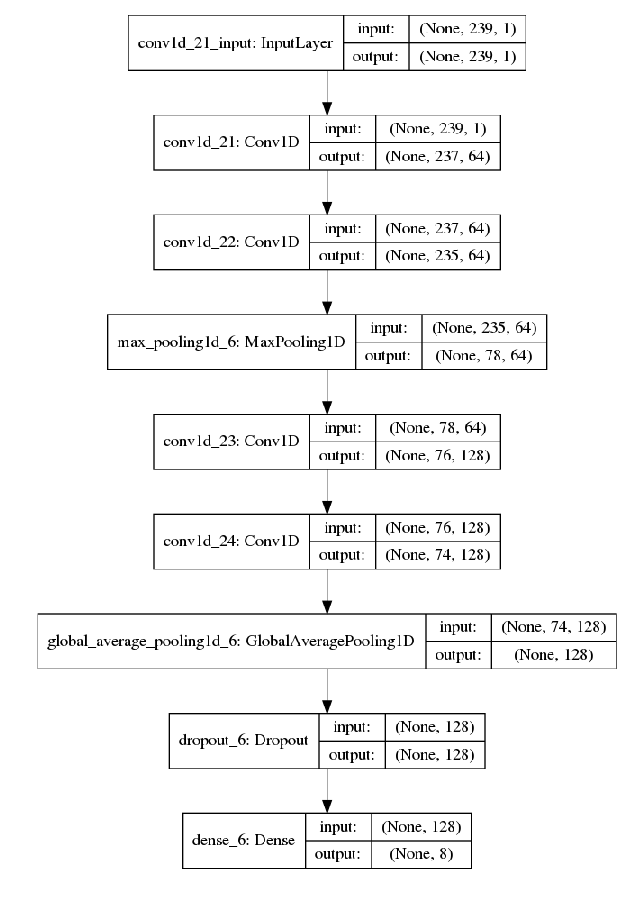

dict_keys(['loss', 'acc'])


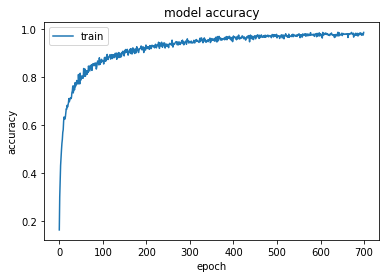

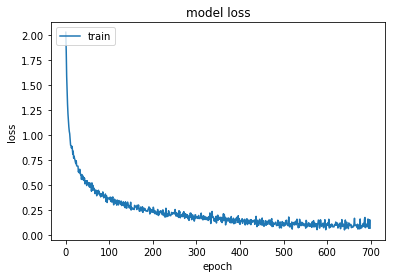

320/320 [==============================] - 0s 852us/step
Accuracy: 94.69%


In [17]:
epochs_total = 700

# Model
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(max_length, 1)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(categories_count, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())
#plot_model(model, to_file=modelfile, show_shapes=True, show_layer_names=True)

history = model.fit(x_train_3d, t_train, batch_size=16, epochs=epochs_total)

# Show model graph
display_image_in_actual_size(modelfile)

# 학습과정 살펴보기
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

score = model.evaluate(x_test_3d, t_test, batch_size=16)
print("Accuracy: %.2f%%" % (score[1]*100))


# 7. Training trials

## 10 trials 700 epochs each

- Try 1: 94.06%

- Try 2: 90.62%

- Try 3: 94.69%

- Try 4: 92.19%

- Try 5: 93.44%

- Try 6: 94.69%

- Try 7: 93.44%

- Try 8: 92.81%

- Try 9: 94.06%

- Try 10: 90.31%


평균 성능: 93.03%


In [22]:
scores_list = [94.06, 90.62, 94.69, 92.19, 93.44, 94.69, 93.44, 92.81, 94.06, 90.31]
print ("Average performance: ", "{:.2f}".format(sum(scores_list) / len(scores_list)), "%")

Average performance:  93.03 %


# 8. Saving model to file

In [11]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
"""
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
"""

# 9. 새로운 기사를 모델로 예측 

- 바로 입력: String 으로 입력하기 위해 약간의 전처리 필요 (따옴표, 엔터 제거)
- 텍스트 파일 입력: 'test_article.txt' 파일에 기사 원문 저장

In [12]:
#sample_prediction_article = ""

In [23]:
#prediction_preprocess = kr_string_preprocess(sample_prediction_article, module_tag, 2, True)
prediction_preprocess = kr_text_preprocess('test_article.txt', module_tag, 2, True)
prediction_data = create_prediction_data(prediction_preprocess, words_dictioinary, word_count, max_length)
prediction_data_reshape = np.reshape(prediction_data, [1, max_length])
prediction_data_3d = np.expand_dims(prediction_data_reshape, axis=2)

print("Prediction demo\n")
print(prediction_preprocess)
print(prediction_data_3d.shape)

Prediction demo

['소나기', '불안정', '정상회담', '정보', '기상', '미터', '동반', '강원', '날씨', '서울', '정도', '남부', '경북', '수도권', '충청', '광주', '동해', '오늘', '호남 지방', '영동', '북미', '지역', '동해안', '대기', '대전', '남해안', '최고', '번개', '예보', '한때', '내륙', '파도', '주의', '천둥', '안팎', '영남 지방', '싱가포르', '너울', '내일', '예상', '우박', '기록', '물결', '지방', '곳곳', '오후', '바다', '구름', '기온', '한낮']
(1, 239, 1)


In [24]:
prediction_test = model.predict(prediction_data_3d)
prediction_index = np.argmax(prediction_test)
print("Predicted category: ", article_categories[prediction_index])
print("Accuracy: ", "{:.2%}".format(prediction_test[0][prediction_index]), '\n\n')

for i in range(categories_count):
    if i != prediction_index:
        print("Category: ", article_categories[i], "- ", "{:.2%}".format(prediction_test[0][i]))

Predicted category:  생활/문화
Accuracy:  99.46% 


Category:  정치 -  0.00%
Category:  경제 -  0.00%
Category:  사회 -  0.00%
Category:  세계 -  0.52%
Category:  기술/IT -  0.01%
Category:  연예 -  0.02%
Category:  스포츠 -  0.00%


# 감사합니다